In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

$$ \ddot{x} + r\dot{x} + \omega _o^2 x + \beta x^3 = f cos \omega t $$

Fazendo mudança de variável:
$$\dot{x} = v$$

Logo

$$ \dot{v} + rv + \omega _0^2 x + \beta x^3 = f cos \omega t $$

Teremos então o seguinte sistema de edo:

$$\begin{align*}
\frac{dv}{dt} &= f cos \omega t - (rv + \omega _0^2 x + \beta x^3) \\
\frac{dx}{dt} &= v
\end{align*}$$

In [2]:
def edo(t,y):
    f = 1
    w = 1
    r = 0.2
    v = y[0]
    x = y[1]
    wo2 = -1
    b = 0.1
    dvdt = f * np.cos(w*t) - (r*v + wo2*x + b*x**3)
    dxdt = v

    return [dvdt,dxdt]

In [3]:
condições_iniciais = [10,0] # velocidade e posição
t0 = 0
tfinal = 10000
incremento = 0.001
ts = np.arange(t0, tfinal, incremento)

sol = solve_ivp(edo,t_span=[t0,tfinal],y0=condições_iniciais,t_eval=ts)

x = sol.y[1]
v = sol.y[0]

Text(0, 0.5, 'x (m)')

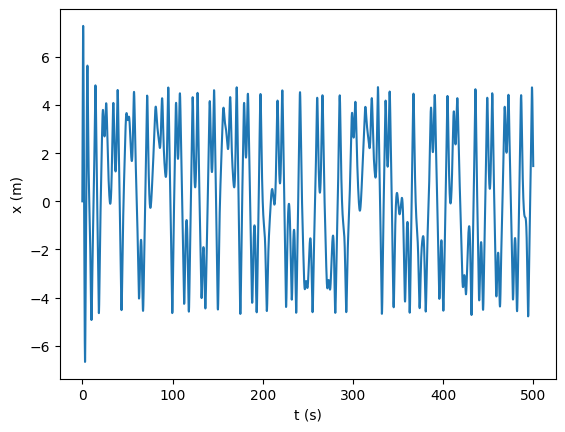

In [7]:
# estado de fase

frames = int(round(tfinal/incremento,0))
Tespecifico = 500
frames_especifico = int(round(frames*Tespecifico/tfinal,0))

plt.plot(ts[:frames_especifico],x[:frames_especifico])
plt.xlabel('t (s)')
plt.ylabel('x (m)')

Text(0.5, 1.0, 'Seção de Poincaré')

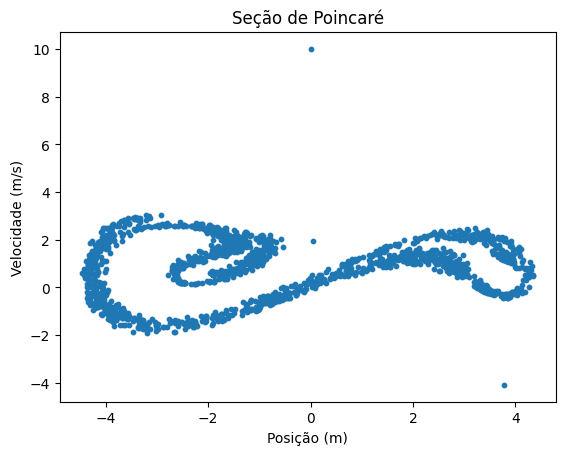

In [11]:
#Poincaré

T = 2 * np.pi  # Período do sistema
indice_poincare = np.arange(0, len(ts), int(T / (ts[1] - ts[0])))
plt.figure()
plt.scatter(x[indice_poincare], v[indice_poincare], s=10)
plt.xlabel('Posição (m)')
plt.ylabel('Velocidade (m/s)')
plt.title('Seção de Poincaré')

Text(0, 0.5, 'v (m/s)')

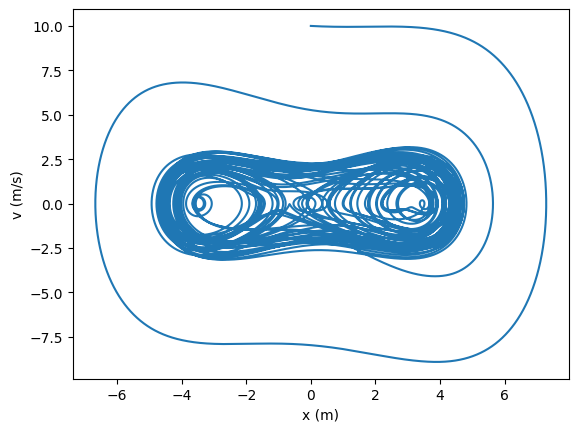

In [9]:
#diagrama de fases 
plt.plot(x[:frames_especifico],v[:frames_especifico])
plt.xlabel('Posição (m)')
plt.ylabel('Velocidade (m/s)')